In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [214]:
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [215]:
print(df.shape)

(5110, 12)


In [216]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [217]:
df=df.rename({'ever_married':'marital_status'}, axis=1)

In [218]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'marital_status', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')


In [219]:
df.columns=map(str.lower,df.columns)

In [220]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'marital_status', 'work_type', 'residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')


In [221]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   marital_status     5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [222]:
df=df.drop_duplicates()

In [223]:
print(df.shape)

(5110, 12)


In [224]:
df['work_type'] = df['work_type'].astype(str).str.lower()
df['gender'] = df['gender'].astype(str).str.lower()
df['marital_status'] = df['marital_status'].astype(str).str.lower()
df['residence_type'] = df['residence_type'].astype(str).str.lower()
df['smoking_status'] = df['smoking_status'].astype(str).str.lower()

In [225]:
df['work_type'] = df['work_type'].replace('self-employed', 'self_employed')
df['smoking_status'] = df['smoking_status'].replace('formerly smoked', 'formerly_smoked')
df['smoking_status'] = df['smoking_status'].replace('never smoked', 'never_smoked')

In [226]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
marital_status         0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [227]:
df.dropna(inplace=True)

In [228]:
df['smoking_status']=df.smoking_status.replace(['unknown'], np.nan)
print(df['smoking_status'].unique())
print(df.isnull().sum())


['formerly_smoked' 'never_smoked' 'smokes' nan]
id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
marital_status          0
work_type               0
residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1483
stroke                  0
dtype: int64


In [229]:
num_features=df[['age', 'bmi', 'avg_glucose_level']]
cat_features=df[['gender', 'marital_status', 'work_type', 'residence_type']]

Bivariate Analysis:
quantitative features VS target

In [230]:
age_stroke=df.age[df.stroke==1]
age_no_stroke=df.age[df.stroke==0]

find mean and median difference
draw boxplot
test hypothesis

In [231]:
mean_age_stroke=np.mean(age_stroke)
mean_age_nostroke=np.mean(age_no_stroke)
mean_diff=mean_age_stroke-mean_age_nostroke
print('Mean Difference of age with and without stroke  : ' +str(mean_diff))
med_age_stroke=np.median(age_stroke)
med_age_nostroke=np.median(age_no_stroke)
med_diff=med_age_stroke-med_age_nostroke
print('Median Difference of age with and without stroke : ' +str(med_diff))

Mean Difference of age with and without stroke  : 25.952467596457304
Median Difference of age with and without stroke : 27.0


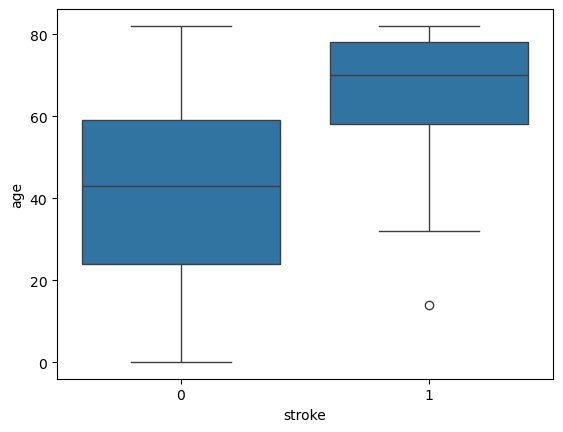

In [232]:
sns.boxplot(df, x='stroke',y='age')
plt.show()

In [250]:
from scipy.stats import ttest_ind
tstat,pval=ttest_ind(age_stroke, age_no_stroke)
print('p-value for age two sample t-test: ' + str(pval))

p-value for age two sample t-test: 3.655693321980558e-61


In [233]:
bmi_stroke=df.bmi[df.stroke==1]
bmi_no_stroke=df.bmi[df.stroke==0]

In [242]:
mean_bmi_stroke=np.mean(bmi_stroke)
mean_bmi_nostroke=np.mean(bmi_no_stroke)
mean_diff_bmi=mean_bmi_stroke-mean_bmi_nostroke
print('Mean Difference of bmi with and without stroke : ' +str(mean_diff_bmi))
med_bmi_stroke=np.median(bmi_stroke)
med_bmi_nostroke=np.median(bmi_no_stroke)
med_diff_bmi=med_bmi_stroke-med_bmi_nostroke
print('Median Difference of bmi with or without stroke : ' +str(med_diff_bmi))

Mean Difference of bmi with and without stroke : 1.6482280362414699
Median Difference of bmi with or without stroke : 1.6999999999999993


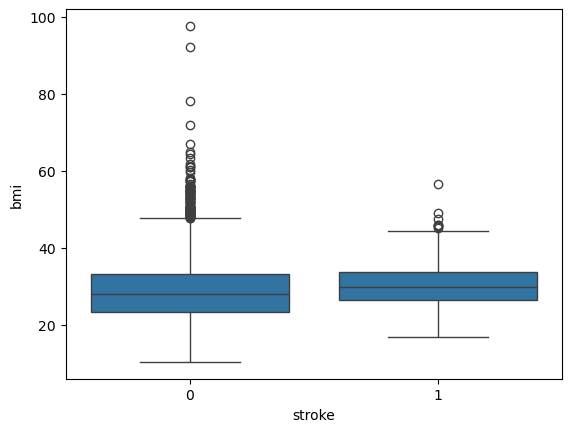

In [241]:
sns.boxplot(df, x='stroke',y='bmi')
plt.show()

In [249]:
from scipy.stats import ttest_ind
tstat,pval=ttest_ind(bmi_stroke, bmi_no_stroke)
print('p-value for bmi two sample t-test: ' + str(pval))

p-value for bmi two sample t-test: 0.0029832690997420824


In [244]:
glu_stroke=df.avg_glucose_level[df.stroke==1]
glu_no_stroke=df.avg_glucose_level[df.stroke==0]

In [245]:
mean_glu_stroke=np.mean(glu_stroke)
mean_glu_nostroke=np.mean(glu_no_stroke)
mean_diff_glu=mean_glu_stroke-mean_glu_nostroke
print('Mean Difference of average glucose level with and without stroke : ' +str(mean_diff_glu))
med_glu_stroke=np.median(glu_stroke)
med_glu_nostroke=np.median(glu_no_stroke)
med_diff_glu=med_glu_stroke-med_glu_nostroke
print('Median Difference of average glucose level with or without stroke : ' +str(med_diff_glu))

Mean Difference of average glucose level with and without stroke : 30.567651389595852
Median Difference of average glucose level with or without stroke : 15.370000000000005


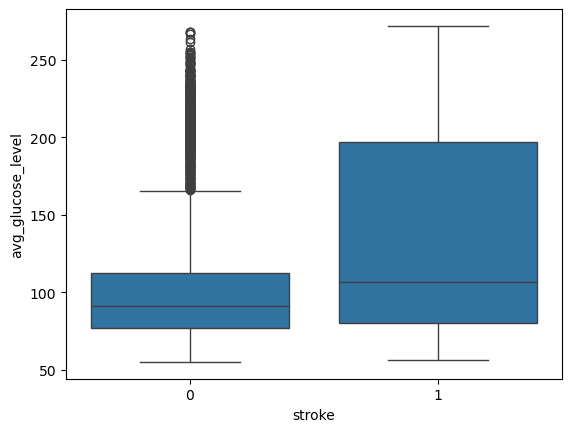

In [246]:
sns.boxplot(df, x='stroke',y='avg_glucose_level')
plt.show()

In [248]:
from scipy.stats import ttest_ind
tstat,pval=ttest_ind(glu_stroke, glu_no_stroke)
print('p-value for average glucose level two sample t-test: ' + str(pval))

p-value for average glucose level two sample t-test: 1.3799691107259876e-22


bivariate analysis:categorical variables VS target

In [257]:
from scipy.stats import chi2_contingency
cat_feature=df[['gender', 'age', 'hypertension', 'heart_disease',
       'marital_status', 'work_type', 'residence_type', 'avg_glucose_level',
       'bmi']]
for cat in cat_feature:
    table=pd.crosstab(df[cat], df.stroke)
    chi,pval,dof,expected=chi2_contingency(table)
    print('the p_value for chi-square test for ' +cat+ ': ' + str(pval))

the p_value for chi-square test for gender: 0.8700408526403285
the p_value for chi-square test for age: 1.9452736798143034e-42
the p_value for chi-square test for hypertension: 6.033751208728256e-23
the p_value for chi-square test for heart_disease: 2.0677783295228626e-21
the p_value for chi-square test for marital_status: 3.1283412849388787e-13
the p_value for chi-square test for work_type: 1.7055668658884947e-08
the p_value for chi-square test for residence_type: 0.7249227580411615
the p_value for chi-square test for avg_glucose_level: 0.011796987703514665
the p_value for chi-square test for bmi: 0.641453321954113


In [235]:
for feat in cat_features: 
    print(cat_features[feat].unique())

['male' 'female' 'other']
['yes' 'no']
['private' 'self_employed' 'govt_job' 'children' 'never_worked']
['urban' 'rural']


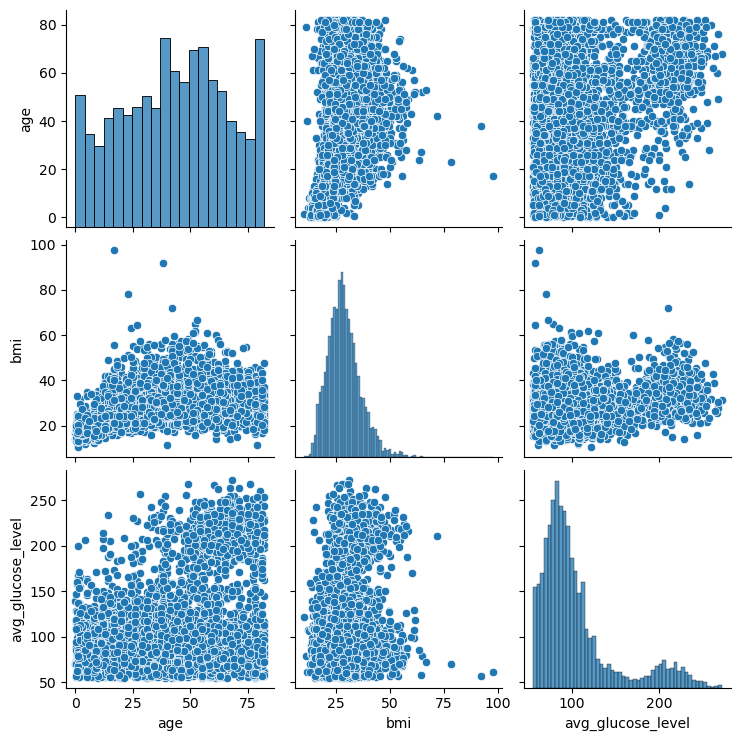

In [236]:
sns.pairplot(num_features)
plt.show()

In [237]:
features= ['age', 'hypertension', 'bmi', 'avg_glucose_level', 'heart_disease','gender', 'marital_status', 'work_type', 'residence_type']
X=pd.get_dummies(df[features], drop_first=True)

Check assumptions of logistic regression:
1-target var is binary
2-independent observation
3-large enough sample size
4-no influential outliers
5-no multicolinearity

In [238]:
print(df.stroke.value_counts())

stroke
0    4700
1     209
Name: count, dtype: int64


In [239]:
print(df.id.nunique()==df.id.count())

True


In [240]:
max_feature_num=min(df.stroke.value_counts()/10)
print(max_feature_num)

20.9


In [259]:
q_hi=df['bmi'].quantile(0.99)
df_filtered=df[(df['bmi']<q_hi)]
q_hi_2=df['avg_glucose_level'].quantile(0.99)
df_filtered_2=df[(df['avg_glucose_level']<q_hi_2)]